<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%8E%89%E5%B1%B1AI%E6%AF%94%E8%B3%BD_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import warnings 
warnings.simplefilter('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
中文map = {'bacno':'歸戶帳號','txkey':'交易序號','locdt':'授權日期','loctm':'授權時間','cano':'交易卡號',
         'contp':'交易類別','etymd':'交易型態','mchno':'特店代號','acqic':'收單行代碼','mcc':'MCC_CODE',
         'conam':'交易金額-台幣(經過轉換)','ecfg':'網路交易註記','insfg':'分期交易註記','iterm':'分期期數',
         'stocn':'消費地國別','scity':'消費城市','stscd':'狀態碼','ovrlt':'超額註記碼','flbmk':'Fallback註記',
         'hcefg':'支付型態','csmcu':'消費地幣別','flg_3dsmk':'3DS交易註記','fraud_ind':'盜刷註記'}

# train

In [3]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/train_預處理完.csv",index_col=0)
print(train.shape)
train.head()

(1521787, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,fraud_ind
0,6862,112785,37846,16158,5,0,0,0,0,0,5,0,0,33,61954,457,59034,0,0,102,0,516056,0
1,0,133951,45476,13693,5,0,0,2,0,0,0,0,0,9,38216,451,0,0,5795,102,0,4376,0
2,6862,15350,187354,16158,5,0,0,0,0,0,5,0,0,6,54640,457,59034,0,0,102,0,483434,0
3,6697,156492,29812,40413,5,62,0,5,0,0,5,0,0,5,62128,247,50185,0,3267,102,0,1407164,0
4,5959,105534,80881,25962,5,62,0,4,0,0,5,0,0,6,65231,263,93290,0,5795,102,0,1051004,0


# test

In [4]:
test = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/test_預處理完.csv",index_col=0)
test_txkey = test["txkey"]
print(test.shape)
test.head()

(421665, 22)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,77950,457,59060,0,0,102,0,592489
1,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,79549,457,59060,0,0,102,0,592452
2,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,100,60355,457,59060,0,0,102,0,590212
3,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,100,60296,457,59060,0,0,102,0,590209
4,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,77933,457,59060,0,0,102,0,592488


# 定義 features & target

In [5]:
features = train.drop(['fraud_ind','txkey','locdt'],axis=1).columns.tolist()
y_name = 'fraud_ind'
print(len(features),features)
print(len([y_name]),[y_name])

20 ['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd', 'flbmk', 'flg_3dsmk', 'hcefg', 'insfg', 'iterm', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd']
1 ['fraud_ind']


# 切分 訓練集 跟 驗證集

In [6]:
from sklearn.model_selection import train_test_split
train,val = train_test_split(train ,test_size=0.2 ,random_state=42)
print(train.shape)
print(val.shape)

(1217429, 23)
(304358, 23)


# train

[1]	train's xentropy: 0.0475798	train's f1: 0.438473	val's xentropy: 0.0478277	val's f1: 0.435756
Training until validation scores don't improve for 10 rounds.
[2]	train's xentropy: 0.0453077	train's f1: 0.439262	val's xentropy: 0.0456993	val's f1: 0.435994
[3]	train's xentropy: 0.0434447	train's f1: 0.443433	val's xentropy: 0.043888	val's f1: 0.439568
[4]	train's xentropy: 0.041611	train's f1: 0.449004	val's xentropy: 0.0421072	val's f1: 0.443385
[5]	train's xentropy: 0.0402822	train's f1: 0.45824	val's xentropy: 0.0408804	val's f1: 0.448993
[6]	train's xentropy: 0.0391684	train's f1: 0.457182	val's xentropy: 0.0397822	val's f1: 0.447903
[7]	train's xentropy: 0.0380235	train's f1: 0.467347	val's xentropy: 0.0385963	val's f1: 0.461052
[8]	train's xentropy: 0.0372286	train's f1: 0.471227	val's xentropy: 0.0378198	val's f1: 0.464777
[9]	train's xentropy: 0.0363361	train's f1: 0.472212	val's xentropy: 0.0369555	val's f1: 0.466601
[10]	train's xentropy: 0.035675	train's f1: 0.473013	val's 

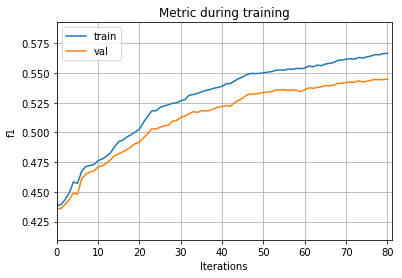

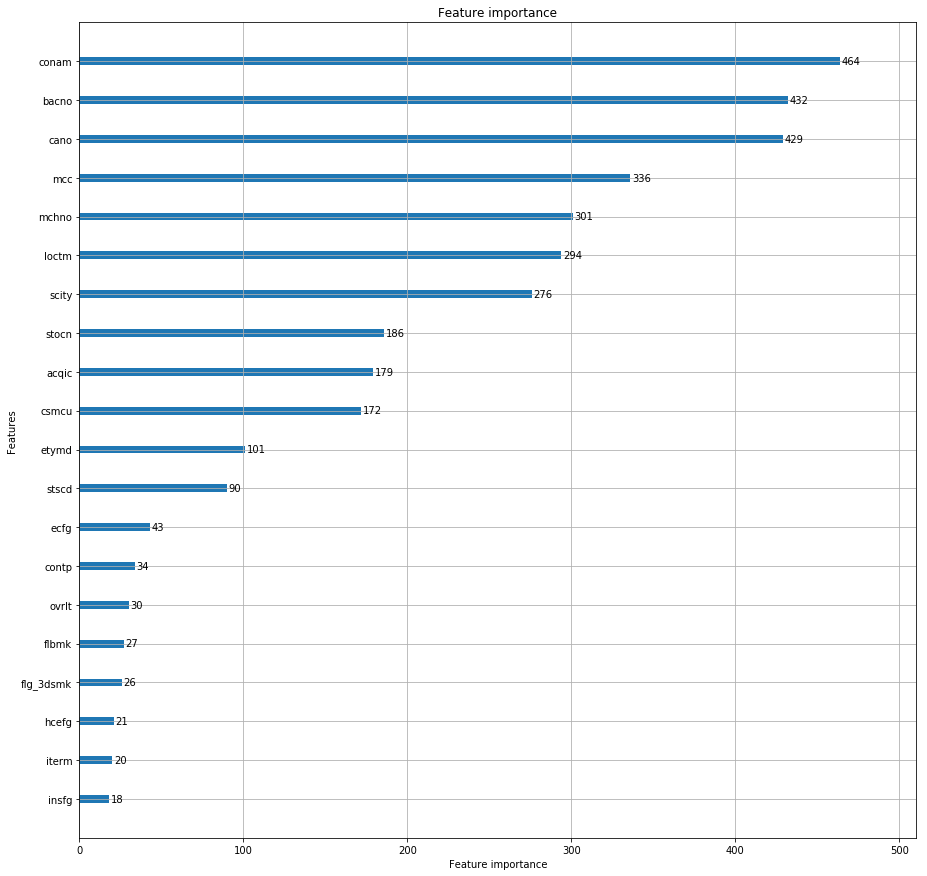

In [7]:
import lightgbm
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

# f1 score
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat)
    return 'f1', f1_score(y_true, y_hat), True

# 超參數  
parameters = {
    'boosting_type':'gbdt',
    'n_estimators':100,
    'objective': 'cross_entropy',
    'metric': 'cross_entropy',
    'num_iterations': 500,
    'learning_rate': 0.1,
    'max_depth':7,
    'num_leaves':50,
    'feature_fraction': 0.7,
    'tree_learner': 'data',
    "is_unbalance": True,
    "early_stopping_round": 10,
    #'min_child_samples':20,
    #'min_child_weight': 0.001,
}

# train data
train_data = lightgbm.Dataset(train[features], 
                              label = train[y_name],
                              categorical_feature = features)
# val data
val_data = lightgbm.Dataset(val[features], 
                            label = val[y_name],
                            categorical_feature = features)

# training
evals_result = {}
model = lightgbm.train(parameters,
                       train_data, 
                       valid_sets=[val_data, train_data],valid_names=['val', 'train'], 
                       feval = lgb_f1_score,
                       evals_result = evals_result)

# plt 1
lightgbm.plot_metric(evals_result, metric='f1')
plt.show()

# plt 2
ax = lightgbm.plot_importance(model, max_num_features=40, figsize=(15,15))
plt.show()

# F1 report

In [8]:
from sklearn.metrics import classification_report 

y_pred = pd.Series(model.predict(val[features])).apply(round)

print(classification_report(val[y_name],y_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    300267
           1       0.75      0.43      0.54      4091

    accuracy                           0.99    304358
   macro avg       0.87      0.71      0.77    304358
weighted avg       0.99      0.99      0.99    304358



# 產生submission

In [9]:
submission = pd.DataFrame({"txkey":test_txkey,
                           "fraud_ind":model.predict(test[features])})

# to [0,1] 
submission["fraud_ind"] = submission["fraud_ind"].apply(round)

# value_counts
print(submission["fraud_ind"].value_counts())
submission.head()

0    418382
1      3283
Name: fraud_ind, dtype: int64


,txkey,fraud_ind
0,592489,0
1,592452,0
2,590212,0
3,590209,0
4,592488,0


# 保存

In [0]:
submission.to_csv("./submission_25.csv")

In [11]:
print(submission["fraud_ind"].value_counts())

0    418382
1      3283
Name: fraud_ind, dtype: int64
